In [1]:
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.core import Flatten

Using TensorFlow backend.


In [4]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [24]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
X_train.shape

(60000, 28, 28)

In [11]:
pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)).astype('float32')
# X_train = X_train.reshape(X_train.shape[0], pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], pixels).astype('float32')

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [45]:
X_train = X_train/255
X_test = X_test/255
image_x, image_y = 28, 28

In [46]:
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test = enc.fit_transform(y_test[:, np.newaxis]).toarray()

In [52]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(16,(2,2),activation = 'relu', input_shape = (image_x, image_y, 1)))
    
    model.add(MaxPooling2D(2,2))
    
    model.add(Flatten())
    
    model.add(Dense(10,activation = 'softmax'))
    
    model.compile(
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
        optimizer = 'adam'
    )
    return model

In [53]:
create_model().summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                27050     
Total params: 27,130
Trainable params: 27,130
Non-trainable params: 0
_________________________________________________________________


In [58]:
model = create_model()

# Fit model
output = model.fit(
    X_train,
    y_train,
    batch_size = 100,
    epochs = 5,
    validation_data=(X_test, y_test)
    )

scores = model.evaluate(X_test, y_test)
    
print('Loss: ', scores[0])
print('Accuracy', scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 102us/step - loss: 0.4354 - accuracy: 0.8845 - val_loss: 0.2551 - val_accuracy: 0.9263
Epoch 2/25
60000/60000 [==============================] - 6s 98us/step - loss: 0.2313 - accuracy: 0.9337 - val_loss: 0.1981 - val_accuracy: 0.9433
Epoch 3/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.1769 - accuracy: 0.9499 - val_loss: 0.1648 - val_accuracy: 0.9541
Epoch 4/25
60000/60000 [==============================] - 6s 98us/step - loss: 0.1403 - accuracy: 0.9609 - val_loss: 0.1354 - val_accuracy: 0.9611
Epoch 5/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.1153 - accuracy: 0.9680 - val_loss: 0.1134 - val_accuracy: 0.9681
Epoch 6/25
60000/60000 [==============================] - 6s 101us/step - loss: 0.0981 - accuracy: 0.9732 - val_loss: 0.1003 - val_accuracy: 0.9701
Epoch 7/25
60000/60000 [==============================] - 7s 113us

In [55]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

/Users/lakshaysahni/Desktop/Research/env/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


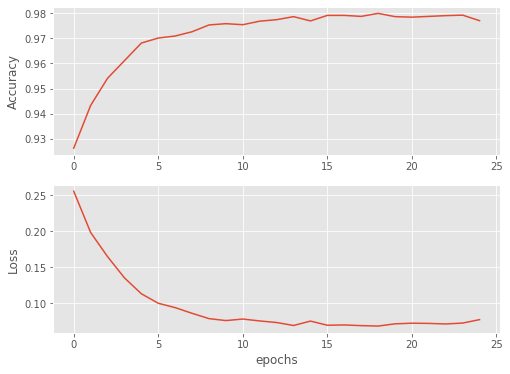

In [59]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
acc = output.history['val_accuracy']
loss = output.history['val_loss']
ax1.plot(acc)
ax2.plot(loss)
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
ax2.set_xlabel('epochs')

fig.show()